<a href="https://colab.research.google.com/github/arvindnswamy/RemoteSensing/blob/development/ContoursUsingOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#I use only io from this set of modules.
from skimage import (
    color, feature, filters, io, measure, morphology, segmentation, util
)

(1024, 1280)


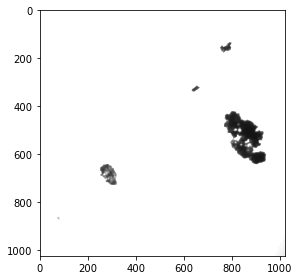

In [ ]:
#Reading the image

img01 = io.imread('CoffeeParticles01.png')[:,:,0]
print(img01.shape)

#Not important to make it equal in both axes, but I did it anyway.
img01 = img01[0:1024, 0:1024]
io.imshow(img01)

#From here, you can jump to where I import cv2

In [ ]:
#To create blobs around features
n=32
l=1024
img01 = filters.gaussian(img01, sigma= l / (4. * n))

In [ ]:
#defining your blob
blobs = img01 > 0.7 * img01.mean()

In [ ]:
#Not sure what this doing to the blabs - labeling, I guess
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

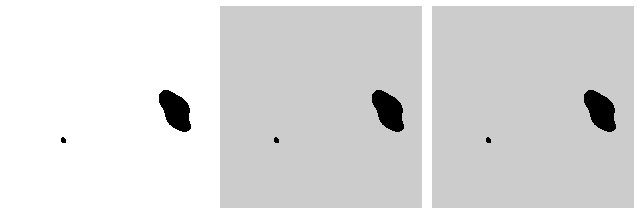

In [ ]:
#Displaying the blobs

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.axis('off')
plt.subplot(133)
plt.imshow(blobs_labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#thresh and bw - take an image and sharpen it by using thresholding
#specifically by using Otsu threshold - I think from the name of the 
#author
thresh = filters.threshold_otsu(img01)
bw = morphology.closing(img01 > thresh, morphology.square(3))

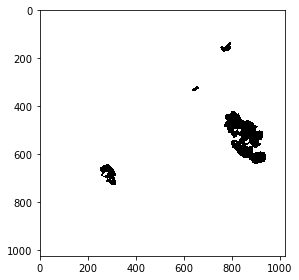

In [ ]:
io.imshow(bw)

In [ ]:
import cv2 as cv2 #importing OpenCV

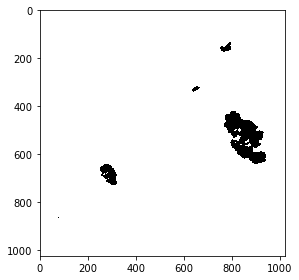

In [ ]:
# Importing the image. You could import a remote sensing water mask image
# instead of this image of ground coffee particles

img01 = cv2.imread('CoffeeParticles01.png',0)

img01 = img01[0:1024, 0:1024]

ret,thresh = cv2.threshold(img01,127,255,0) #thresholding, this time using
                                            #OpenCV

io.imshow(thresh) #showing the image using skimage.io

In [ ]:
#Drawing contours - not sure how openCV does it.
contours, hierarchy = cv2.findContours(thresh, 
                                       cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)
#countours is an array of arrays. The pixels corresponding to each 

In [ ]:
cv2.__version__

'4.1.0'

In [ ]:
#Here is where you are playing around with the contours themselves
#specifically with contourArea and arcLength
import numpy as np

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#contours is pretty clear.
#hierarchy is cool - it tells you if some contours are nested within 
#other contours

frame = thresh
'''
new_frame = np.zeros(frame.shape, np.uint8)

for i, contour in enumerate(contours):
    c_area = cv2.contourArea(contour)
    print(c_area)
    mask = np.zeros(frame.shape, np.uint8)
    cv2.drawContours(mask, contour, -1, 255, 3)
    mask = cv2.bitwise_and(frame, mask)
    new_frame = cv2.bitwise_or(new_frame, mask)

frame = new_frame
'''

for i, contour in enumerate(contours):
    c_area = cv2.contourArea(contour)
    c_perimeter = cv2.arcLength(contour, True)
    print("area: ", c_area, "perimeter: ", c_perimeter)

frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

#This is where you are drawing the contours
# -1 means you plot for all contours
# (0, 255, 0) - contour drawn in green color
# 2 - line thickness of contour. Can reduce to 1 to see smaller contours

frameWithContours = cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)

area:  1046529.0 perimeter:  4092.0
area:  37.0 perimeter:  29.79898953437805
area:  4315.5 perimeter:  322.9777022600174
area:  0.0 perimeter:  0.0
area:  6.5 perimeter:  10.242640614509583
area:  66.5 perimeter:  51.35533821582794
area:  21614.5 perimeter:  955.9036681652069
area:  12.5 perimeter:  13.071067690849304
area:  14.0 perimeter:  15.656854152679443
area:  160.5 perimeter:  56.52691113948822
area:  13.0 perimeter:  13.656854152679443
area:  1.5 perimeter:  6.2426406145095825
area:  121.5 perimeter:  53.21320295333862
area:  45.0 perimeter:  27.313708305358887
area:  87.0 perimeter:  35.79898941516876
area:  0.0 perimeter:  2.0
area:  471.0 perimeter:  94.22539603710175
area:  1156.5 perimeter:  165.23758804798126


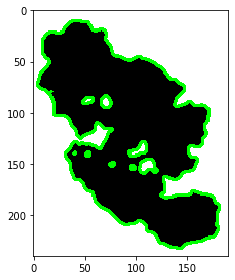

In [ ]:
io.imshow(frameWithContours[410:650,760:950])

In [ ]:
1024*1024

1048576

In [ ]:
contours[0]

array([[[   0,    0]],

       [[   0, 1023]],

       [[1023, 1023]],

       [[1023,    0]]], dtype=int32)

In [ ]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 6,  1,  3,  0],
        [ 4, -1, -1,  2],
        [ 5,  3, -1,  2],
        [-1,  4, -1,  2],
        [16,  2,  7,  0],
        [ 8, -1, -1,  6],
        [ 9,  7, -1,  6],
        [10,  8, -1,  6],
        [11,  9, -1,  6],
        [12, 10, -1,  6],
        [13, 11, -1,  6],
        [14, 12, -1,  6],
        [15, 13, -1,  6],
        [-1, 14, -1,  6],
        [17,  6, -1,  0],
        [-1, 16, -1,  0]]], dtype=int32)